Exploration du corpus CAMille

## Imports

In [1]:
from pathlib import Path
import pandas as pd
import PyPDF2

Préparation du dossier et vérification des fichiers

In [3]:
data_dir = Path("../data/camille_pdf")

# On vérifie que le dossier existe
if data_dir.exists():
    print(f"Le dossier existe deja:{data_dir}")
else:
     print(f"Le dossier n'existe pas. Creation de :{data_dir}")
     data_dir.mkdir(parents=True, exist_ok=True)
     print("Dossier cree avec succes")

Le dossier existe deja:..\data\camille_pdf


Exploration du dossier

In [4]:
pdf_files = sorted(data_dir.glob("*.pdf"))

if pdf_files:
    print(f"Nombre de fichiers PDF trouvés : {len(pdf_files)}")
    [f.name for f in pdf_files[:5]]
else:
    print("Aucun fichier PDF trouvé dans ce dossier. "
          "Fichers a telecharge a https://max.de.wilde.web.ulb.be/camille/")

Nombre de fichiers PDF trouvés : 51


Lecture d'un PDF et extraction du texte

Selction d'un PDF

In [5]:
assert len(pdf_files) > 0, "Aucun PDF trouvé dans ../data/camille_pdf"
sample_path = pdf_files[0]

reader = PyPDF2.PdfReader(sample_path)
num_pages = len(reader.pages)

print(f"Fichier : {sample_path.name}")
print(f"Pages   : {num_pages}")

Fichier : KB_JB230_1892-08-07_01-0003.pdf
Pages   : 1


Extraction et appercu du texte

In [8]:
texts = []
for p in range(num_pages):
    try:
        page = reader.pages[p]
        txt = page.extract_text() or ""
        texts.append(txt)
    except Exception as e:
        texts.append("")

full_text = "\n".join(texts)

print("Aperçu du texte extrait:\n")
print(full_text)

Aperçu du texte extrait:

llUr fili ont tiibi «veeS£
U section  nor- 
iceés l’examen  de sortie oour  
foWentiet  dn diplCmo  d’institairke.
Ce qui Km (frappé  quand  H noua a été donné  de 
ràier [ Institut,  c m le caractère  de distinction  qal 
ai rnpraac  aux élèves  par naedireettoart  ne g rores  
fe «alureaes  de premier  ordre.  la loa. ta tenue  août  
urftita. « ce a'eat  pas une choea banale  que de troo-  
ïer one Kaison  où l’on s'occupe,  en Même  tempe  qoe 
rtruer  Mer esprit  et de développer  leur intoffigaoaa,  
afcrncr  le caractère,  le Jugement  al les manière*  de*
Palais  de Justice
Don  M*
nard' 1asatlon rt. -ü„____ de Riom (France)  a prononcé  vendredi
m irrdt dan* l'affaire  d'assassinat  commis  i Ponl-  
f*ot. sur la personne  de IL Durif, par 1a femme  de „ dernier  et par l’ami de celle-ci.
artisanat,  autour  du crime, et aa compagne,  U 
veuve Durif,  sont  condamnés  4 mort.
[n entaadant  la condamnation  prononcée  contre  ara 
g, ii anime Carthonne

Analyse repide du texte

In [9]:
# on vérifie que 'full_text' existe (créé à l'étape 2)
assert 'full_text' in globals(), "Le texte n'a pas encore été extrait. Exécute d'abord l'etape precedenre."

nb_caracteres = len(full_text)
nb_mots = len(full_text.split())
moyenne_caracteres_par_page = nb_caracteres / num_pages if num_pages else 0
moyenne_mots_par_page = nb_mots / num_pages if num_pages else 0

print(f"Statistiques du document : {sample_path.name}\n")
print(f"Nombre de pages             : {num_pages}")
print(f"Nombre total de caractères  : {nb_caracteres:,}")
print(f"Nombre total de mots        : {nb_mots:,}")
print(f"Moyenne caractères / page   : {moyenne_caracteres_par_page:,.0f}")
print(f"Moyenne mots / page         : {moyenne_mots_par_page:,.0f}")

Statistiques du document : KB_JB230_1892-08-07_01-0003.pdf

Nombre de pages             : 1
Nombre total de caractères  : 42,150
Nombre total de mots        : 7,025
Moyenne caractères / page   : 42,150
Moyenne mots / page         : 7,025


Analyse comparative de plusieurs fichiers PDF

In [10]:
# On choisit 05 PDF pour éviter de tout lire
echantillon = pdf_files[:5]
resultats = []

for fichier in echantillon:
    reader = PyPDF2.PdfReader(fichier)
    num_pages = len(reader.pages)
    texte = ""
    for p in range(num_pages):
        try:
            page = reader.pages[p]
            texte += page.extract_text() or ""
        except:
            pass  # ici on ignore les pages mal reconnues

    nb_caracteres = len(texte)
    nb_mots = len(texte.split())
    moyenne_mots_par_page = nb_mots / num_pages if num_pages else 0

    resultats.append({
        "Fichier": fichier.name,
        "Pages": num_pages,
        "Caractères": nb_caracteres,
        "Mots": nb_mots,
        "Moyenne_mots/page": round(moyenne_mots_par_page, 1)
    })

In [11]:

# On cree un DataFrame pour visualiser les résultats
df_resultats = pd.DataFrame(resultats)
df_resultats

,Fichier,Pages,Caractères,Mots,Moyenne_mots/page
0,KB_JB230_1892-08-07_01-0003.pdf,1,42150,7025,7025.0
1,KB_JB230_1903-10-16_01-0002.pdf,1,50243,8083,8083.0
2,KB_JB230_1913-07-05_01-0001.pdf,1,39049,6349,6349.0
3,KB_JB258_1884-09-03_01-0003.pdf,1,32471,5270,5270.0
4,KB_JB258_1894-12-09_01-0003.pdf,1,41573,6755,6755.0


Graphique Resultats OCR

([0, 1, 2, 3, 4],
 [Text(0, 0, 'KB_JB230_1892-08-07_01-0003.pdf'),
  Text(1, 0, 'KB_JB230_1903-10-16_01-0002.pdf'),
  Text(2, 0, 'KB_JB230_1913-07-05_01-0001.pdf'),
  Text(3, 0, 'KB_JB258_1884-09-03_01-0003.pdf'),
  Text(4, 0, 'KB_JB258_1894-12-09_01-0003.pdf')])

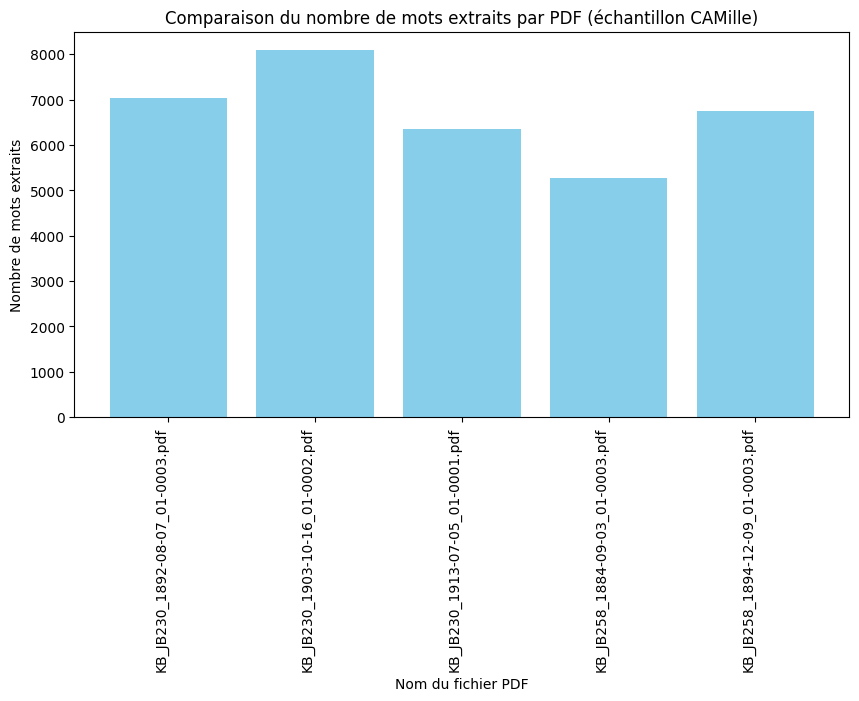

In [14]:
import matplotlib.pyplot as plt

# Configuration du graphique
plt.figure(figsize=(10, 5))
plt.bar(df_resultats["Fichier"], df_resultats["Mots"], color="skyblue")

# Titres et labels
plt.title("Comparaison du nombre de mots extraits par PDF (échantillon CAMille)")
plt.xlabel("Nom du fichier PDF")
plt.ylabel("Nombre de mots extraits")

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=90, ha='right')

<Figure size 640x480 with 0 Axes>

## Pour en savoir plus

- [Tutoriel SQLite](https://www.sqlitetutorial.net/)
- [The SQL cheat sheet](https://www.sqltutorial.org/wp-content/uploads/2016/04/SQL-cheat-sheet.pdf)